<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-dsercam/blob/main/Module3.A01182676.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font color="darkblue">Data Analysis with Python (IBM)</font>**
##**<font color="darkorange"> Module 3: Notes and exercises Jupyter Notebook</font>**

###**Maestría en Inteligencia Artificial Aplicada**
###**Curso: Ciencia y analítica de datos**
####**Tecnológico de Monterrey**
#####**Prof Jobish Vallikavungal Devassia**

###**<font color="darkgray">Nombre del estudiante: Dante Rodrigo Serna Camarillo</font>**
###**<font color="darkgray">Matrícula: A01182676</font>**

### <b><font color="darkorange">Exploratory Data Analysis</font></b>
- Preliminary to data analysis, its objective is:
- Summarize main characteristics of the data
- Gain better understanding of the data set
- Uncover relationships between variables
- Extract Important variables
<br><br>
What are the charactersitics that have the more weight on out predictions?


### <b><font color="darkpurple">Descriptive statistics</font></b>
- Before bulding models, spend some time understanding your data. Some useful methods are:
- describe() -> automatically computes basic statistics for NUMERICAL features. <font color="darkred">IMPORTANT! NAN are excluded in the calculation of these statistics</font>
- value_counts() -> will summarize categorical data
<br><br>
Visualization of data:
- Boxplots are useful for numeric data (median, quartiles, outliers, quartile ranges, etc)
- Scatter plot help us visualize the realtion between two varibles. (Use predictor/independent variable on x axis, target variable in y axis).


In [7]:
# Get the CSV to perform some examples
import pandas as pd 
import numpy as np
csv_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
masterDataFrame = pd.read_csv(csv_path, skipinitialspace=True, header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
masterDataFrame.columns = headers
masterDataFrame.replace("?",0, inplace=True)
masterDataFrame["price"] = masterDataFrame["price"].astype("float")
masterDataFrame.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


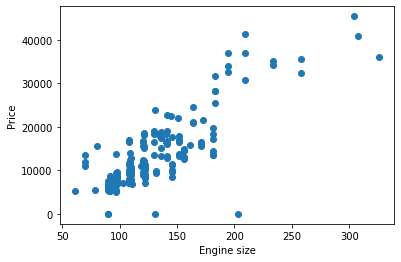

In [8]:
import matplotlib.pyplot as plt 
x = masterDataFrame['engine-size']
y = masterDataFrame['price']
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.scatter(x,y)


### <b><font color="darkpurple">Group by/Grouping data</font></b>
- Used for categorical features, groups data into categories
- You can group date by a single variable or multiple variables



In [11]:
#pick the columns you are interested in, in this case we want to determine the influence of drive-wheels & body-style over price
df_test = masterDataFrame[['drive-wheels','body-style','price']]
# group data by body-style and drive-wheels
groupedDataFrame = df_test.groupby(['drive-wheels','body-style'], as_index=False).mean()
groupedDataFrame

,drive-wheels,body-style,price
0,4wd,hatchback,3801.500000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9467.526316
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [13]:
#data can be visualized better using a pivot table
pivot_groupedDataFrame = groupedDataFrame.pivot(index='drive-wheels',columns='body-style')
pivot_groupedDataFrame

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   3801.500000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9467.526316   
rwd              23949.6  24202.714286  13583.157895  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

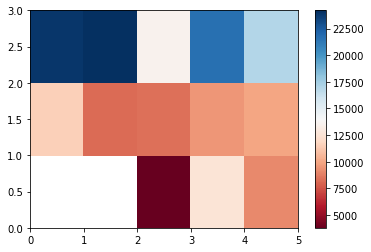

In [15]:
#heatmap is very useful as well
plt.pcolor(pivot_groupedDataFrame,cmap='RdBu')
plt.colorbar()
plt.show()

### <b><font color="darkpurple">Analysis of Variance - ANOVA</font></b>

